<a href="https://www.kaggle.com/code/rkmaurya93/bank-dataset-binary-calssification?scriptVersionId=257553662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [137]:
import pandas as pd
import numpy as np

In [138]:
df=pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv",index_col=0)

In [139]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [140]:
df.shape

(750000, 17)

# Working with the categorical columns:

### Counting the repetation of values:

In [141]:
categorical_features=df.select_dtypes(include='object').columns

In [142]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [143]:
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
id,,,,,,,,,
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [144]:
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [145]:
df['poutcome'].value_counts()

poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64

In [146]:
# Encoding the Poutcome column:
from category_encoders import TargetEncoder

In [147]:
te_poutcome=TargetEncoder(cols=['poutcome'])
df['poutcome']=te_poutcome.fit_transform(df['poutcome'],df['y'])

In [148]:
df['poutcome']

id
0         0.101898
1         0.101898
2         0.101898
3         0.101898
4         0.101898
            ...   
749995    0.101898
749996    0.101898
749997    0.101898
749998    0.101898
749999    0.132794
Name: poutcome, Length: 750000, dtype: float64

In [149]:
df['poutcome'].value_counts()

poutcome
0.101898    672450
0.132794     45115
0.764004     17691
0.166848     14744
Name: count, dtype: int64

In [150]:
df['month'].value_counts()

month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
mar      5802
dec      2069
Name: count, dtype: int64

In [151]:
from category_encoders import TargetEncoder

te_month = TargetEncoder(smoothing=0.3)
df['month'] = te_month.fit_transform(df['month'], df['y'])

In [152]:
df['month'].value_counts()

month
0.071354    228411
0.112161    128859
0.090847    110647
0.103726     93670
0.109806     66062
0.235654     41319
0.206801     37611
0.124148     18937
0.490004      9204
0.534755      7409
0.571355      5802
0.513291      2069
Name: count, dtype: int64

### Contact column:

In [153]:
df['contact'].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [154]:
# Apply target encoding on the contact column
te_contact=TargetEncoder()
df['contact']=te_contact.fit_transform(df['contact'],df['y'])

In [155]:
df['loan'].value_counts()

loan
no     645023
yes    104977
Name: count, dtype: int64

In [156]:
# Apply label encoding
from sklearn.preprocessing import LabelEncoder

In [157]:
le=LabelEncoder()
df['loan']=le.fit_transform(df['loan'])

### House:

In [158]:
df['housing'].value_counts()

housing
yes    411288
no     338712
Name: count, dtype: int64

In [159]:
df['housing']=le.fit_transform(df['housing'])

### default:

In [160]:
df['default'].value_counts()

default
no     737151
yes     12849
Name: count, dtype: int64

In [161]:
df['default']=le.fit_transform(df['default'])

In [162]:
df['education'].value_counts()

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

In [163]:
te_education=TargetEncoder()

In [164]:
df['education']=te_education.fit_transform(df['education'],df['y'])

### marital:

In [165]:
df['marital'].value_counts()

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

In [166]:
te_marital=TargetEncoder()
df['marital']=te_marital.fit_transform(df['marital'],df['y'])

In [167]:
te_job=TargetEncoder()

In [168]:
df['job']=te_job.fit_transform(df['job'],df['y'])

In [169]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,0.118321,0.101872,0.105491,0,7,0,0,0.156579,25,0.112161,117,3,-1,0,0.101898,0
1,38,0.067438,0.101872,0.105491,0,514,0,0,0.042953,18,0.103726,185,1,-1,0,0.101898,0
2,36,0.067438,0.101872,0.105491,0,602,1,0,0.042953,14,0.071354,111,2,-1,0,0.101898,0
3,27,0.340784,0.170453,0.105491,0,34,1,0,0.042953,28,0.071354,10,2,-1,0,0.101898,0
4,26,0.118321,0.101872,0.105491,0,889,1,0,0.156579,3,0.206801,902,1,-1,0,0.101898,1


In [170]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,0.118321,0.101872,0.105491,0,7,0,0,0.156579,25,0.112161,117,3,-1,0,0.101898,0
1,38,0.067438,0.101872,0.105491,0,514,0,0,0.042953,18,0.103726,185,1,-1,0,0.101898,0
2,36,0.067438,0.101872,0.105491,0,602,1,0,0.042953,14,0.071354,111,2,-1,0,0.101898,0
3,27,0.340784,0.170453,0.105491,0,34,1,0,0.042953,28,0.071354,10,2,-1,0,0.101898,0
4,26,0.118321,0.101872,0.105491,0,889,1,0,0.156579,3,0.206801,902,1,-1,0,0.101898,1


# Working with the numerical columns:

In [171]:
import seaborn as sns

In [172]:
import matplotlib.pyplot as plt 

### Age:

In [173]:
df['age'].describe()

count    750000.000000
mean         40.926395
std          10.098829
min          18.000000
25%          33.000000
50%          39.000000
75%          48.000000
max          95.000000
Name: age, dtype: float64

<Axes: >

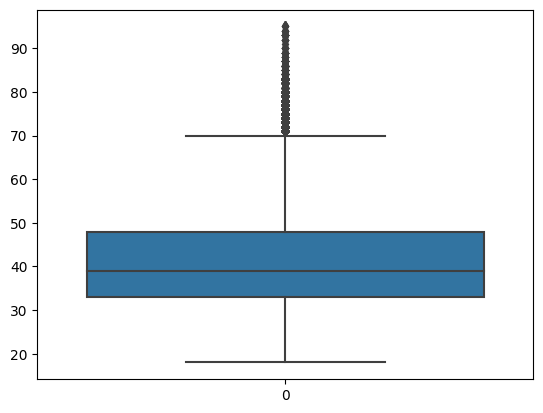

In [174]:
sns.boxplot(df['age'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


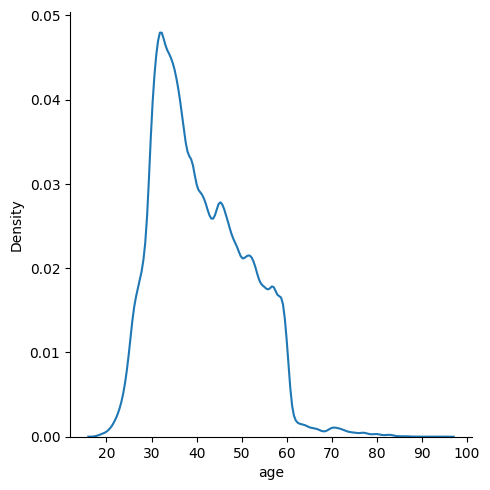

In [175]:
sns.displot(df['age'],kind='kde')

### balance:

In [176]:
df['balance'].describe()

count    750000.000000
mean       1204.067397
std        2836.096759
min       -8019.000000
25%           0.000000
50%         634.000000
75%        1390.000000
max       99717.000000
Name: balance, dtype: float64

<Axes: >

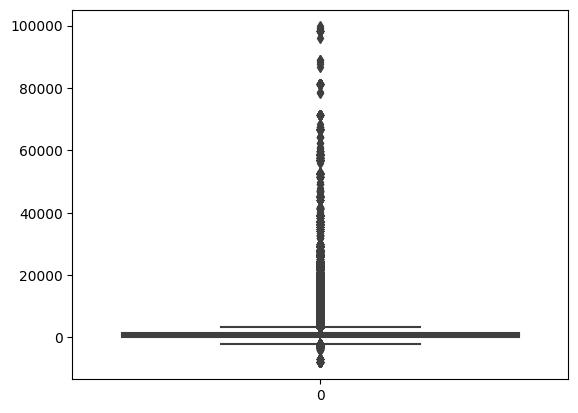

In [177]:
sns.boxplot(df['balance'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


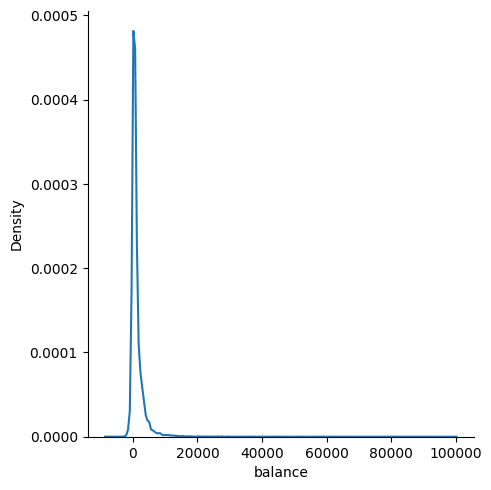

In [178]:
sns.displot(df['balance'],kind='kde')

### duration

In [179]:
df['duration'].describe()

count    750000.000000
mean        256.229144
std         272.555662
min           1.000000
25%          91.000000
50%         133.000000
75%         361.000000
max        4918.000000
Name: duration, dtype: float64

<Axes: >

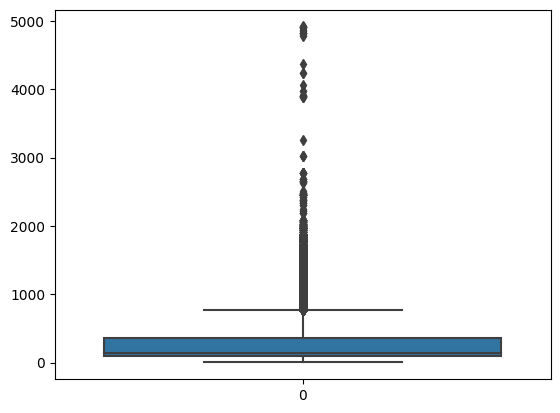

In [180]:
sns.boxplot(df['duration'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


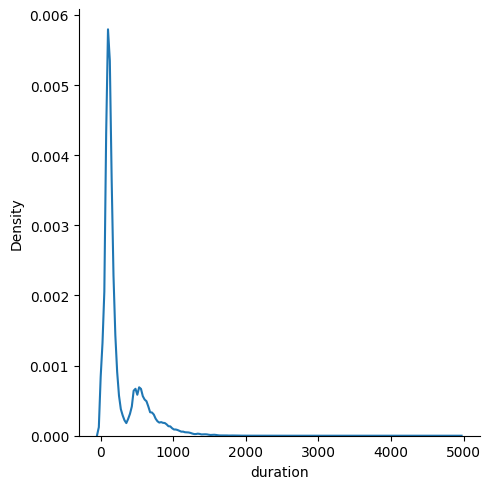

In [181]:
sns.displot(df['duration'],kind='kde')

# finding the coorelation with the target column:

In [182]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.131672,-0.439077,-0.123123,-0.014364,0.062838,-0.180702,-0.016553,-0.009551,-0.015179,0.055805,-0.004388,0.002052,-0.021635,0.004541,0.030986,0.009523
job,0.131672,1.000000,0.125537,0.327387,-0.022682,0.078093,-0.253872,-0.071600,0.165682,-0.002910,0.192716,0.034976,-0.029045,-0.003480,0.033429,0.097276,0.157306
marital,-0.439077,0.125537,1.000000,0.152589,0.003824,0.011349,-0.027215,-0.048956,0.055630,-0.013022,0.058489,0.049092,-0.022464,0.032145,0.026152,0.033698,0.090998
education,-0.123123,0.327387,0.152589,1.000000,-0.014660,0.074696,-0.128442,-0.056729,0.167540,0.020801,0.088498,0.010202,0.014173,-0.006779,0.021458,0.050920,0.089501
default,-0.014364,-0.022682,0.003824,-0.014660,1.000000,-0.071747,0.010113,0.089927,-0.015994,0.013138,-0.033865,-0.032804,0.027781,-0.016455,-0.014491,-0.020855,-0.030134
balance,0.062838,0.078093,0.011349,0.074696,-0.071747,1.000000,-0.062347,-0.089571,0.043710,-0.008269,0.093668,0.109629,-0.027744,0.010040,0.033897,0.062159,0.122513
housing,-0.180702,-0.253872,-0.027215,-0.128442,0.010113,-0.062347,1.000000,0.064034,-0.254862,-0.015233,-0.206464,-0.008623,-0.034655,0.118199,0.035385,-0.075785,-0.153589
loan,-0.016553,-0.071600,-0.048956,-0.056729,0.089927,-0.089571,0.064034,1.000000,0.007985,0.020151,-0.069402,-0.031161,0.016346,-0.012193,-0.013188,-0.047434,-0.081639
contact,-0.009551,0.165682,0.055630,0.167540,-0.015994,0.043710,-0.254862,0.007985,1.000000,0.032462,0.266719,0.042042,0.022148,0.196909,0.144703,0.122289,0.159913
day,-0.015179,-0.002910,-0.013022,0.020801,0.013138,-0.008269,-0.015233,0.020151,0.032462,1.000000,-0.074908,-0.056755,0.178806,-0.086197,-0.051082,-0.039322,-0.049625


In [183]:
corr_matrix=df.corr()

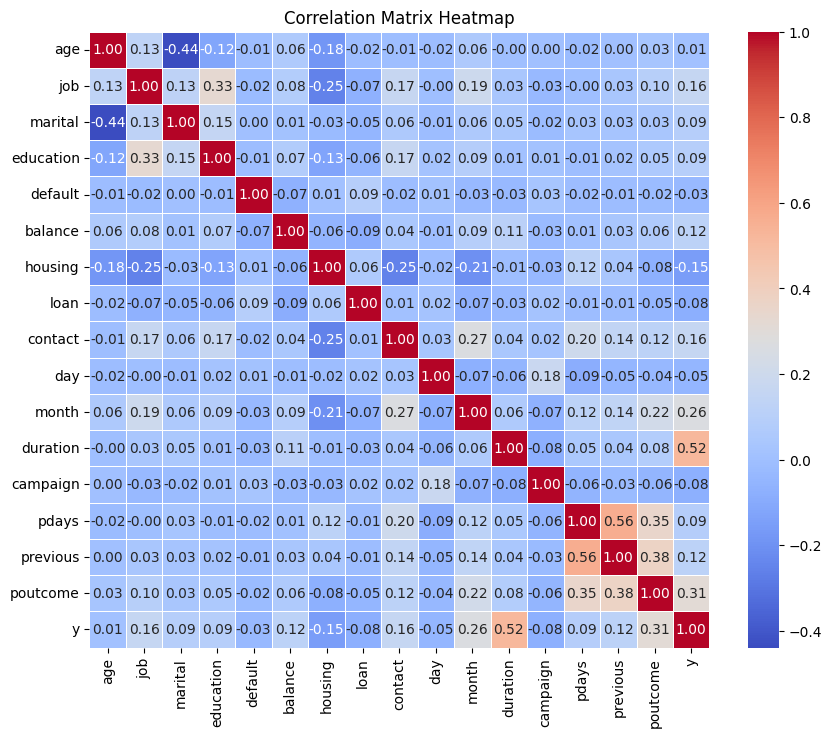

In [184]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting dataset Into training and testing:

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x=df.drop('y',axis=1)
y=df['y']

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [188]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
453635,28,0.067438,0.170453,0.105491,0,5090,1,1,0.042953,12,0.071354,1297,2,-1,0,0.101898
11651,51,0.118321,0.101872,0.162649,0,1295,0,0,0.156579,27,0.112161,119,9,-1,0,0.101898
431999,57,0.150392,0.111576,0.162649,0,0,0,0,0.156579,29,0.124148,87,1,-1,0,0.101898
529211,48,0.067438,0.170453,0.083097,0,1323,1,0,0.042953,15,0.071354,83,5,-1,0,0.101898
110925,38,0.116453,0.101872,0.105491,0,659,1,0,0.156579,28,0.090847,534,4,-1,0,0.101898


In [189]:
y_train.head()

id
453635    1
11651     0
431999    0
529211    0
110925    0
Name: y, dtype: int64

# Scaling the training data:

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
ss=StandardScaler()

In [192]:
x_train_transformed=ss.fit_transform(x_train)
x_test_transformed=ss.transform(x_test)

In [193]:
x_train_transformed.shape

(600000, 16)

# Stacking with Meta Learner:

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [195]:
# ✅ Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict_proba(x_test)[:, 1]

# ✅ Train Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn.fit(x_train_transformed, y_train)
nn_preds = nn.predict_proba(x_test_transformed)[:, 1]

# ✅ Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
xgb_preds = xgb.predict_proba(x_test)[:, 1]

# ✅ Train LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_preds = lgbm.predict_proba(x_test)[:, 1]


[LightGBM] [Info] Number of positive: 72283, number of negative: 527717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120472 -> initscore=-1.987971
[LightGBM] [Info] Start training from score -1.987971


In [196]:
# ✅ Stack predictions horizontally
stacked_preds = np.vstack([rf_preds, nn_preds, xgb_preds, lgbm_preds]).T

# ✅ Train meta learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(stacked_preds, y_test)

# ✅ Final predictions
final_preds = meta_model.predict(stacked_preds)

# ✅ Evaluate
accuracy = accuracy_score(y_test, final_preds)
print("Stacked Model Accuracy:", round(accuracy * 100, 2), "%")

Stacked Model Accuracy: 93.49 %


In [197]:
from xgboost import XGBClassifier

meta_model_xg_boost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model_xg_boost.fit(stacked_preds, y_test)
final_preds = meta_model.predict(stacked_preds)

from sklearn.metrics import accuracy_score
print("Stacked Accuracy with XGBoost Meta:", round(accuracy_score(y_test, final_preds) * 100, 2), "%")

Stacked Accuracy with XGBoost Meta: 93.49 %


# importing the testing dataset:

In [198]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e8/test.csv',index_col=0)

In [199]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


# encoding the categorical columns:

In [200]:
df_test['job']=te_job.transform(df_test['job'])
df_test['marital']=te_marital.transform(df_test['marital'])
df_test['education']=te_education.transform(df_test['education'])
df_test['contact']=te_contact.transform(df_test['contact'])
df_test['month']=te_month.transform(df_test['month'])


In [201]:
df_test['poutcome']=te_poutcome.transform(df_test['poutcome'])

In [202]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,0.118321,0.101872,0.105491,0,7,0,0,0.156579,25,0.112161,117,3,-1,0,0.101898,0
1,38,0.067438,0.101872,0.105491,0,514,0,0,0.042953,18,0.103726,185,1,-1,0,0.101898,0
2,36,0.067438,0.101872,0.105491,0,602,1,0,0.042953,14,0.071354,111,2,-1,0,0.101898,0
3,27,0.340784,0.170453,0.105491,0,34,1,0,0.042953,28,0.071354,10,2,-1,0,0.101898,0
4,26,0.118321,0.101872,0.105491,0,889,1,0,0.156579,3,0.206801,902,1,-1,0,0.101898,1


In [203]:
df_test['default']=le.transform(df_test['default'])
df_test['housing']=le.transform(df_test['housing'])
df_test['loan']=le.transform(df_test['loan'])


In [204]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
750000,32,0.067438,0.101872,0.105491,0,1397,1,0,0.042953,21,0.071354,224,1,-1,0,0.101898
750001,44,0.150392,0.101872,0.162649,0,23,1,0,0.156579,3,0.235654,586,2,-1,0,0.101898
750002,36,0.129443,0.101872,0.083097,0,46,1,1,0.156579,13,0.071354,111,2,-1,0,0.101898
750003,58,0.067438,0.101872,0.105491,0,-1380,1,1,0.042953,29,0.071354,125,1,-1,0,0.101898
750004,28,0.118321,0.170453,0.105491,0,1950,1,0,0.156579,22,0.090847,181,1,-1,0,0.101898


In [207]:
df_test_scaled=ss.transform(df_test)

# predicting with meta model:

In [208]:
# Step 1: Get base model probabilities
rf_probs = rf.predict_proba(df_test_scaled)[:, 1]
nn_probs = nn.predict_proba(df_test_scaled)[:, 1]
xgb_probs = xgb.predict_proba(df_test_scaled)[:, 1]
lgbm_probs = lgbm.predict_proba(df_test_scaled)[:, 1]

# Step 2: Stack them horizontally
stacked_probs = np.vstack([rf_probs, nn_probs, xgb_probs, lgbm_probs]).T

# Step 3: Predict probabilities using meta-model
final_probs_lr = meta_model.predict_proba(stacked_probs)
probs_class_1_lr = final_probs_lr[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [209]:
probs_class_1_lr

array([0.02316256, 0.03560688, 0.01977372, ..., 0.05003708, 0.01758421,
       0.03614769])

In [210]:
final_probs_xgb = meta_model_xg_boost.predict_proba(stacked_probs)
probs_class_1_xgb = final_probs_xgb[:, 1]

In [211]:
probs_class_1_xgb 

array([0.00844985, 0.01383177, 0.00522086, ..., 0.02016467, 0.00550125,
       0.02209172], dtype=float32)

In [215]:
submission_df = pd.DataFrame({
    'y': probs_class_1_lr  # or final_preds
}, index=df_test.index)

submission_df.to_csv('submission_probs.csv')